# ABC Data Analysis

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_context('talk')

## Chord Symbols

### n-grams

In [2]:
df = pd.read_csv('data/all_annotations.tsv', sep='\t')

In [3]:
df.head()

,chord,altchord,measure,beat,totbeat,timesig,op,no,mov,length,global_key,local_key,pedal,numeral,form,figbass,changes,relativeroot,phraseend
0,.Eb.I,NaN,1,1.0,1.0,2/4,127,12,1,2.5,Eb,I,NaN,I,NaN,NaN,NaN,NaN,False
1,V43,NaN,2,1.5,3.5,2/4,127,12,1,1.5,Eb,I,NaN,V,NaN,43.0,NaN,NaN,False
2,I,NaN,3,1.0,5.0,2/4,127,12,1,2.5,Eb,I,NaN,I,NaN,NaN,NaN,NaN,False
3,V2,NaN,4,1.5,7.5,2/4,127,12,1,1.5,Eb,I,NaN,V,NaN,2.0,NaN,NaN,False
4,I6,NaN,5,1.0,9.0,2/4,127,12,1,1.0,Eb,I,NaN,I,NaN,6.0,NaN,NaN,False


In [4]:
df['figbass_str'] = df['figbass'].fillna('').astype(str).str.replace('.0', '')

In [5]:
tokens = [
    'numeral',
    'form',
    'figbass_str',
#     'changes',
#     'relativeroot',
#     'phraseend'
]

In [6]:
df['token'] = ''

for token in tokens:
    s = df[token].fillna('')
    df['token'] += s.values.astype(str)

In [7]:
# df['token'] = df.chord

In [8]:
df.token.unique()

array(['I', 'V43', 'V2', 'I6', 'vi', 'IV', 'ii6', 'vi64', 'ii7', 'III',
       'V', 'V7', 'ii43', 'V65', 'IV2', 'I+6', 'I64', 'iiio6', 'III7',
       'II65', '#vo7', 'vii%7', '#iv%7', 'V64', 'ii', 'i', 'v6', 'II64',
       'v', 'iv', 'II6', 'i6', 'i64', 'iio64', 'iio6', '#viio2',
       '#viio43', 'ii%7', 'IV64', 'II2', 'II43', 'V6', 'iv6', 'II7',
       'vii%43', 'I7', 'IV6', 'I2', 'VII', 'I43', 'iv64', 'i2', 'IV65',
       'bIII7', 'bVI', 'bIII2', 'vio65', 'vio43', 'bvii6', 'bII7',
       'iiio2', 'iiio65', 'iiio43', 'iiio7', 'vo65', 'vo2', 'bVI64',
       'bVI6', 'bVII2', 'viio43', 'ii65', 'ii64', 'I65', 'IV43', 'bVII',
       '#io7', 'VI64', 'viio2', 'IV+', '#ivo7', '#ivo', 'viio64', 'viio7',
       'vi6', 'ivo', 'viio6', 'vi2', '#viio6', 'vi7', 'ii2', 'viio',
       '#viio7', '#viio', 'V+6', 'bII6', '#ivo2', 'viio65', 'iiio64',
       'Ger6', 'VI', '#io64', 'iiio', '#vo2', 'Fr6', '#viio65', 'ii%65',
       'vi65', '#vio65', '#vi65', 'v43', '#vo43', 'vi43', '#V', '',
       '#io2',

In [9]:
grouped = df.groupby(['op', 'no', 'mov'])

In [10]:
def get_ngrams(matrix, n):
    ngrams = matrix[0:n, n-1:]
    
    ngram_list = [ngrams[:,i][::-1] for i in range(ngrams.shape[1])]
    
    return ngram_list

In [11]:
unigrams = df.token.value_counts()

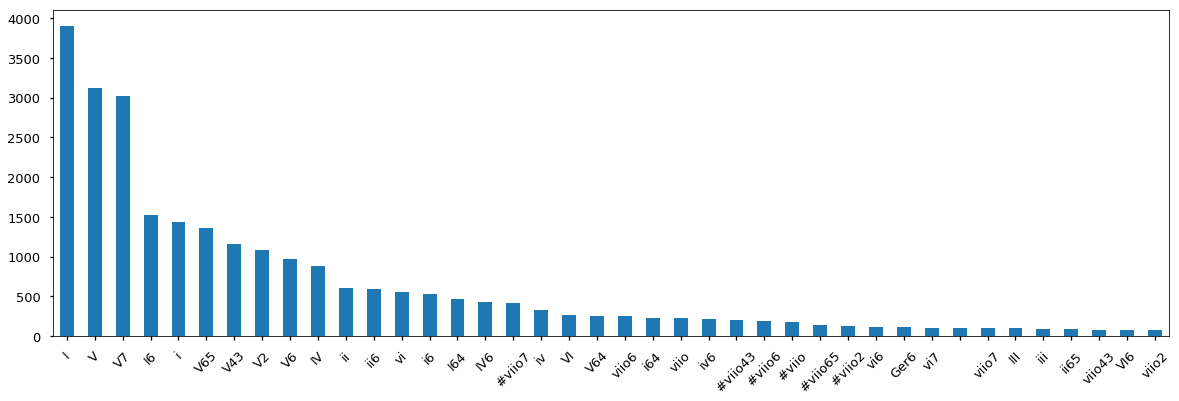

In [12]:
unigrams[:40].plot.bar(figsize=(20,6), rot=45);

In [13]:
bigrams = []
trigrams = []

for index, group in grouped:
    group = group.reset_index()
    
    # initialize ngram matrix
    matrix = np.zeros((len(group), len(group)), dtype='object')
    
    # fill matrix
    matrix[0, :] = group['token'].values
    for i in range(1,len(group)):
        matrix[i, i:] = group['token'][:-i]
        
    bigrams.append(get_ngrams(matrix, 2))
    trigrams.append(get_ngrams(matrix, 3))

### Transition table for bigrams

In [14]:
bigram_counts = pd.DataFrame(0,index=unigrams.index, columns=unigrams.index)

In [17]:
for bg_list in bigrams:
    for bg in bg_list:
        bigram_counts.loc[bg[0], bg[1]] += 1

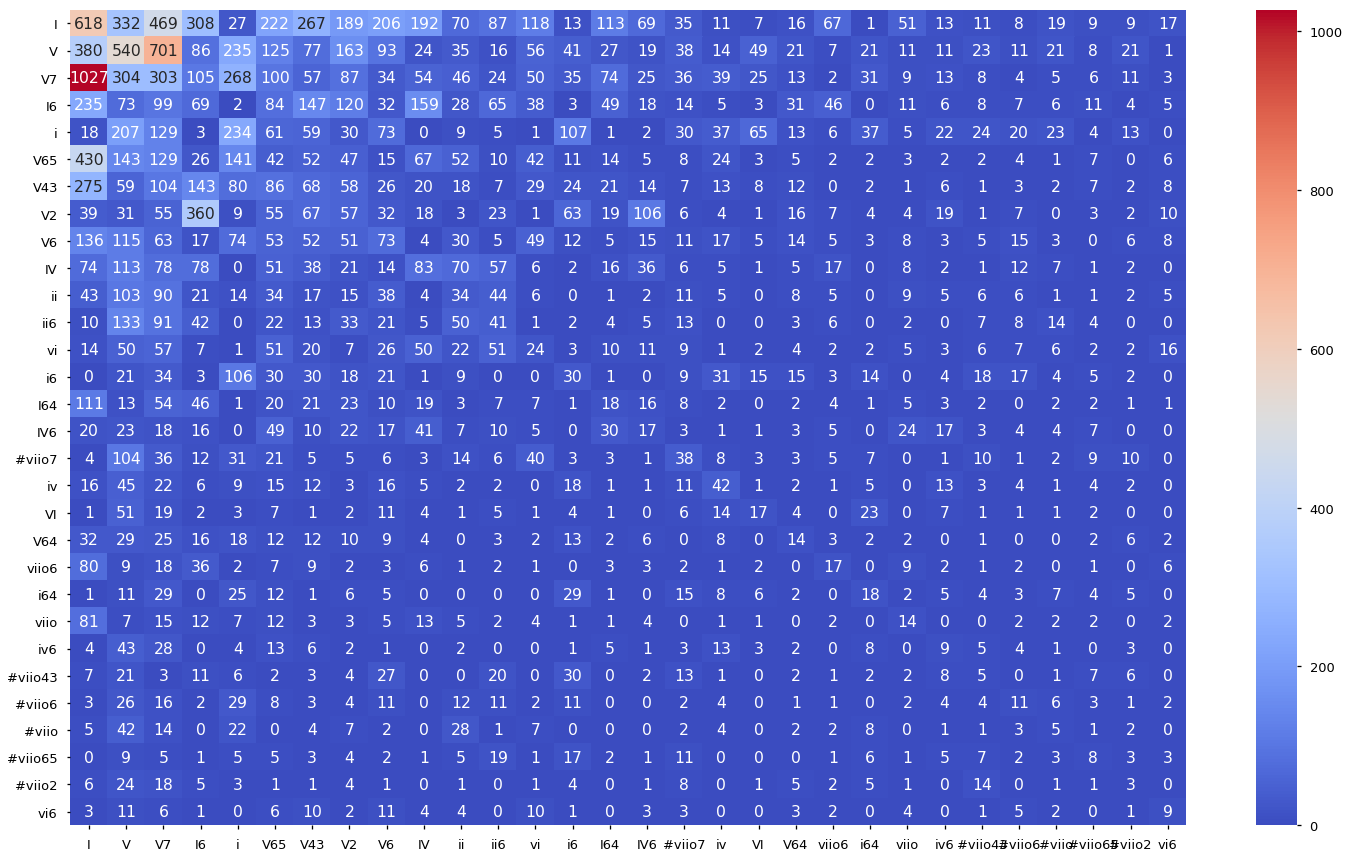

In [21]:
plt.figure(figsize=(25,15))
sns.heatmap(bigram_counts.iloc[:30, :30], 
            cmap='coolwarm', 
            annot=True, 
            fmt='.0f');

plt.xticks(rotation=0);

### Bigram Entropy

In [22]:
bigram_counts.head()

,I,V,V7,I6,i,V65,V43,V2,V6,IV,...,#vio,#iv7,VI65,#iiio65,vo6,ivo64,II+,bii7,IM7,ii%
I,618,332,469,308,27,222,267,189,206,192,...,0,0,0,0,0,0,0,0,0,0
V,380,540,701,86,235,125,77,163,93,24,...,0,0,0,1,0,0,0,0,0,0
V7,1027,304,303,105,268,100,57,87,34,54,...,0,0,0,0,0,1,0,0,1,0
I6,235,73,99,69,2,84,147,120,32,159,...,0,0,0,0,0,0,0,0,0,0
i,18,207,129,3,234,61,59,30,73,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
normalized_bigrams = bigram_counts.div(bigram_counts.sum(axis=1), axis=0)
normalized_bigrams.head()

,I,V,V7,I6,i,V65,V43,V2,V6,IV,...,#vio,#iv7,VI65,#iiio65,vo6,ivo64,II+,bii7,IM7,ii%
I,0.160021,0.085966,0.121440,0.079751,0.006991,0.057483,0.069135,0.048938,0.053340,0.049715,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
V,0.122147,0.173578,0.225329,0.027644,0.075538,0.040180,0.024751,0.052395,0.029894,0.007715,...,0.0,0.0,0.0,0.000321,0.0,0.000000,0.0,0.0,0.000000,0.0
V7,0.340179,0.100696,0.100364,0.034780,0.088771,0.033124,0.018880,0.028817,0.011262,0.017887,...,0.0,0.0,0.0,0.000000,0.0,0.000331,0.0,0.0,0.000331,0.0
I6,0.154301,0.047932,0.065003,0.045305,0.001313,0.055154,0.096520,0.078792,0.021011,0.104399,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
i,0.012614,0.145060,0.090399,0.002102,0.163980,0.042747,0.041345,0.021023,0.051156,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0


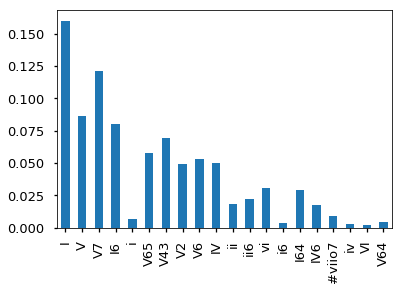

In [24]:
normalized_bigrams.loc['I'][:20].plot(kind='bar');

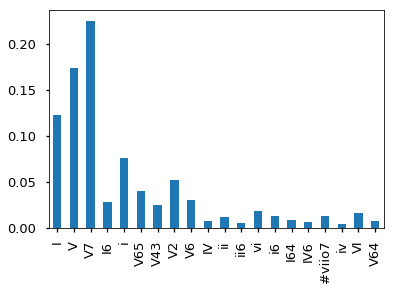

In [25]:
normalized_bigrams.loc['V'][:20].plot(kind='bar')

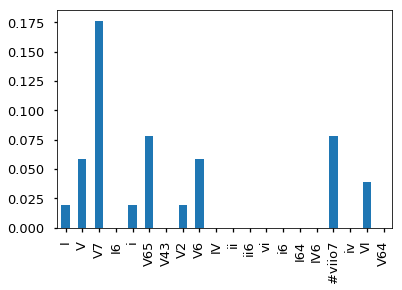

In [26]:
normalized_bigrams.loc['bII'][:20].plot(kind='bar')

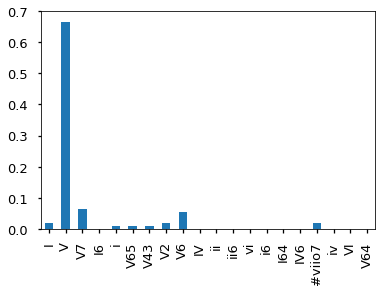

In [27]:
normalized_bigrams.loc['Ger6'][:20].plot(kind='bar')

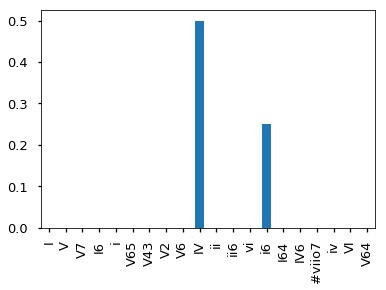

In [30]:
normalized_bigrams.loc['III+'][:20].plot(kind='bar')

In [31]:
from scipy.stats import entropy

In [32]:
entropies = {}
for u in unigrams.index:
    H = entropy(bigram_counts.loc[u,:])
    entropies[u] = H

In [33]:
entropies = pd.Series(entropies)

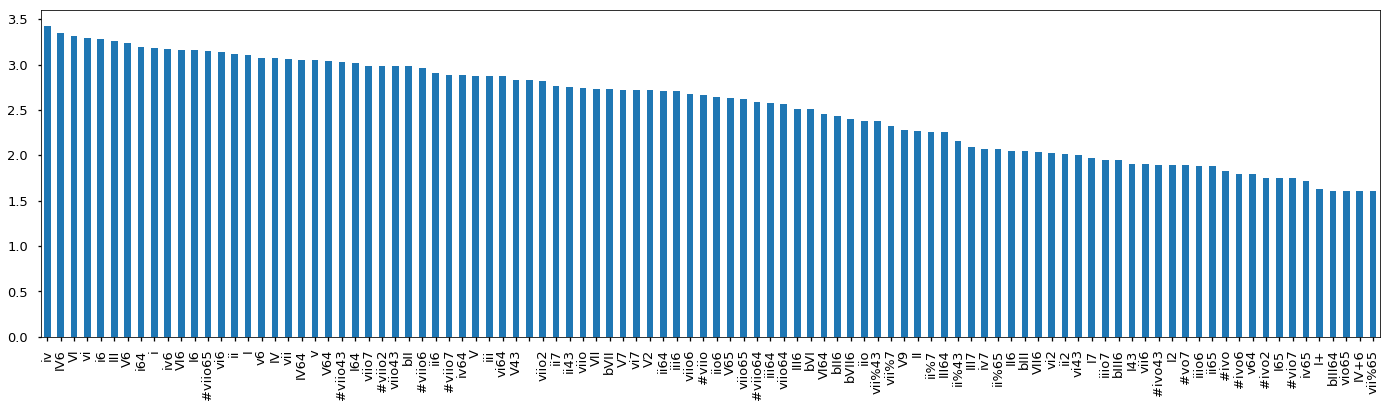

In [34]:
entropies.sort_values(ascending=False)[:100].plot(kind='bar', figsize=(24,6));

### KL Divergence

In [35]:
KL = pd.DataFrame(0,index=unigrams.index, columns=unigrams.index)

In [36]:
for index1, row1 in normalized_bigrams.iterrows():
    for index2, row2 in normalized_bigrams.iterrows():
        KL.loc[index1, index2] += entropy(row1,row2)

In [37]:
KL.head(10)

,I,V,V7,I6,i,V65,V43,V2,V6,IV,...,#vio,#iv7,VI65,#iiio65,vo6,ivo64,II+,bii7,IM7,ii%
I,0.000000,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
V,inf,0.000000,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
V7,inf,inf,0.000000,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
I6,inf,inf,inf,0.000000,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
i,inf,inf,inf,inf,0.000000,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
V65,inf,inf,inf,inf,inf,0.000000,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
V43,inf,inf,inf,inf,inf,inf,0.000000,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
V2,inf,inf,inf,inf,inf,inf,inf,0.000000,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
V6,inf,inf,inf,inf,inf,inf,inf,inf,0.000000,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
IV,inf,inf,inf,inf,inf,inf,inf,inf,inf,0.000000,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf


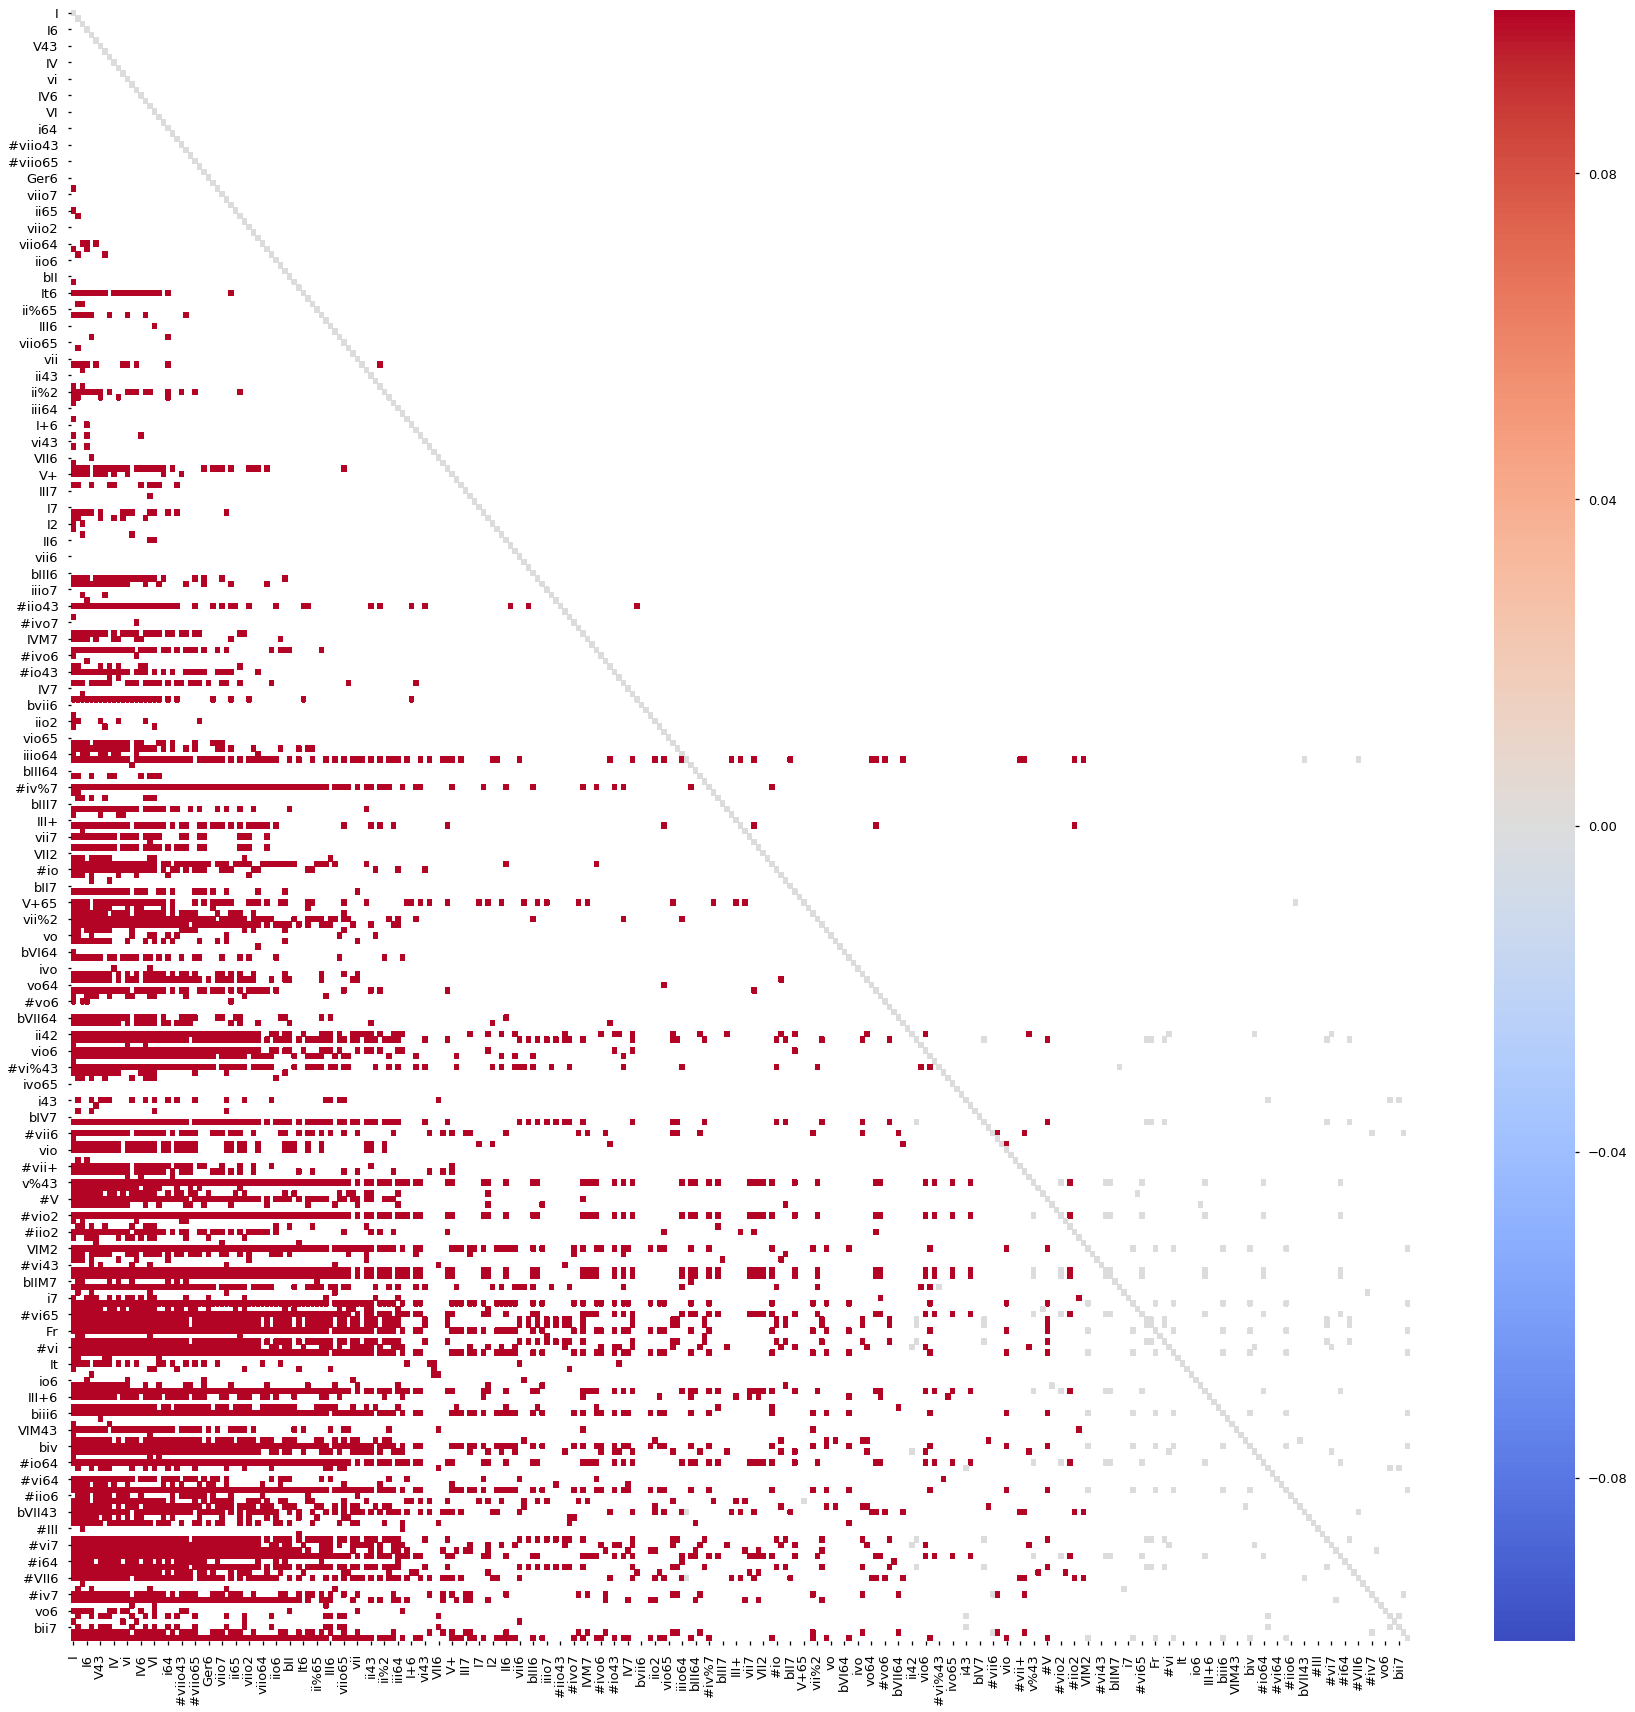

In [38]:
plt.figure(figsize=(30,30))
sns.heatmap(KL, cmap='coolwarm');

### Correlation

In [39]:
corr = pd.DataFrame(0,index=unigrams.index, columns=unigrams.index)

In [40]:
for index1, row1 in normalized_bigrams.iterrows():
    for index2, row2 in normalized_bigrams.iterrows():
        corr.loc[index1, index2] += np.correlate(row1,row2)

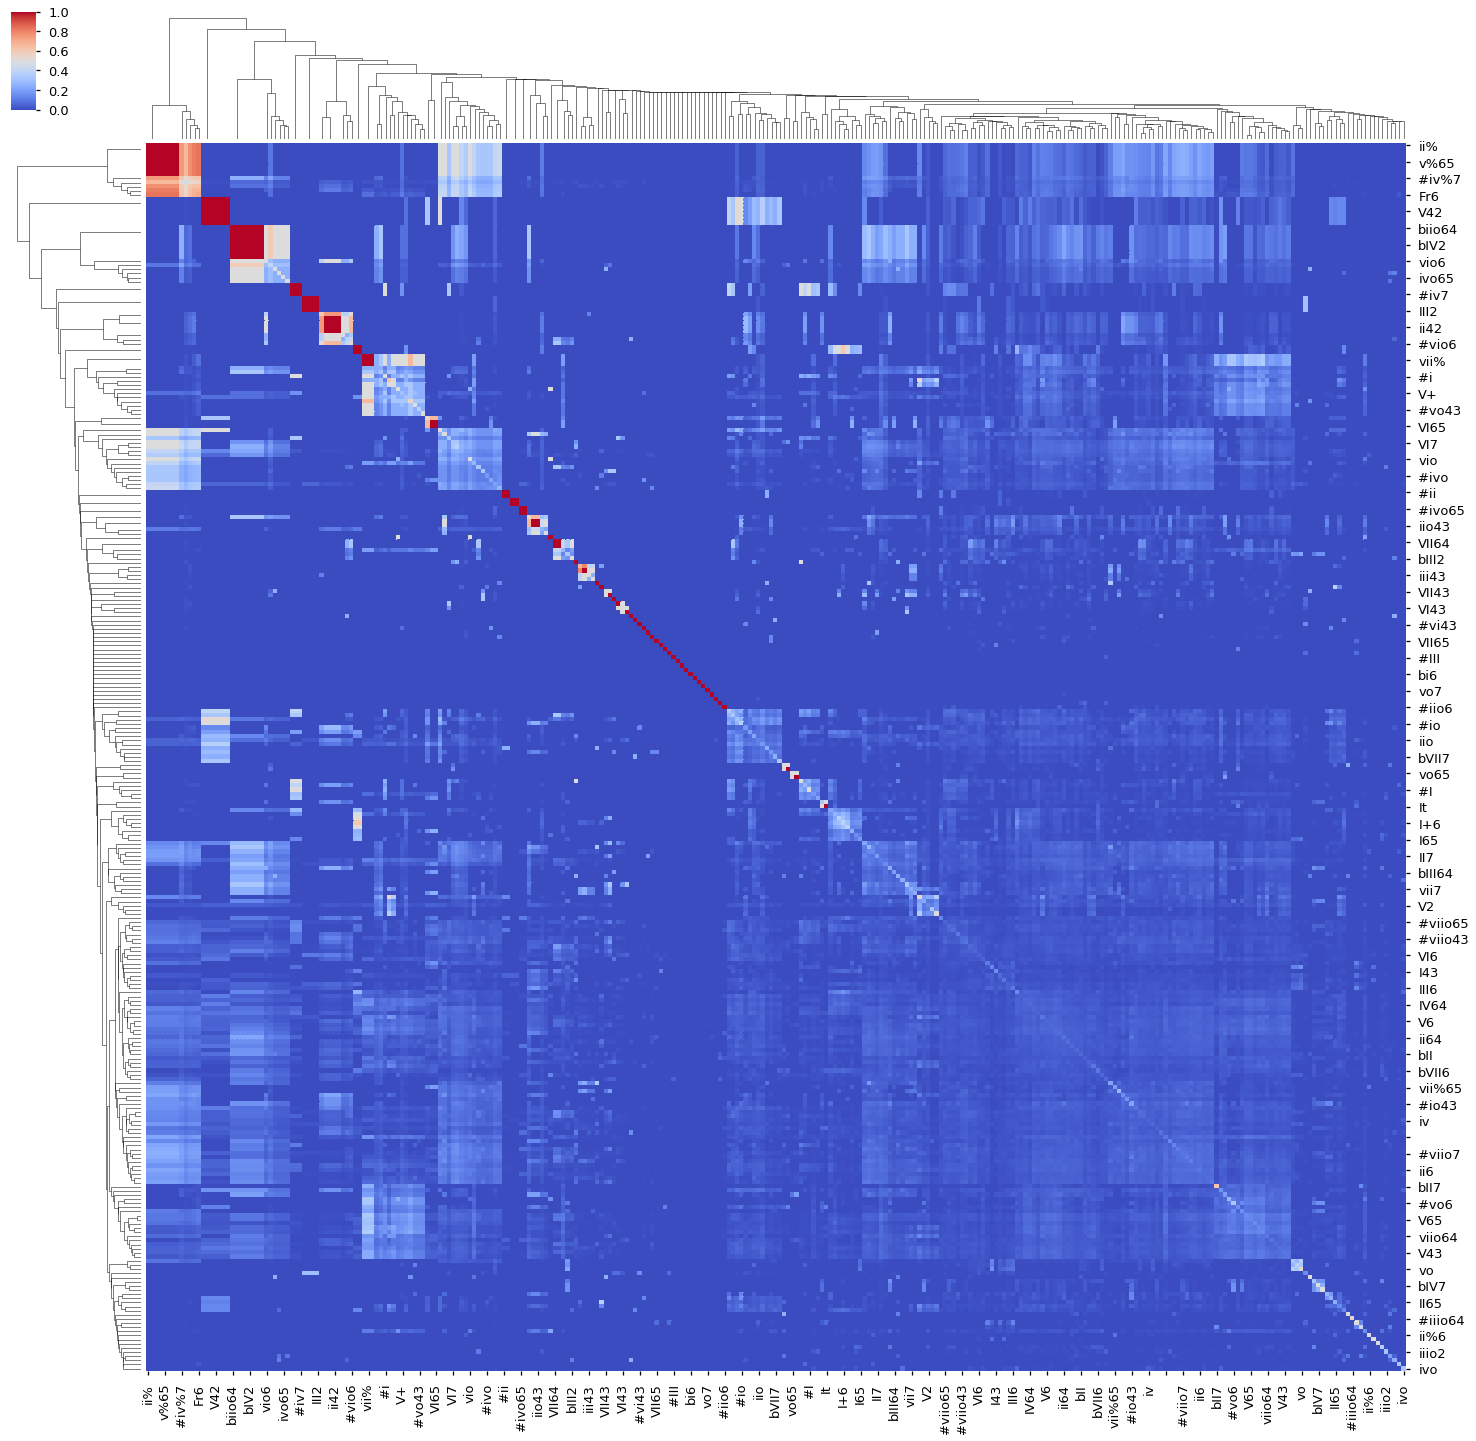

In [41]:
sns.clustermap(corr, cmap='coolwarm', figsize=(25,25));

## Keys

In [42]:
df.head()

,chord,altchord,measure,beat,totbeat,timesig,op,no,mov,length,...,local_key,pedal,numeral,form,figbass,changes,relativeroot,phraseend,figbass_str,token
0,.Eb.I,NaN,1,1.0,1.0,2/4,127,12,1,2.5,...,I,NaN,I,NaN,NaN,NaN,NaN,False,,I
1,V43,NaN,2,1.5,3.5,2/4,127,12,1,1.5,...,I,NaN,V,NaN,43.0,NaN,NaN,False,43,V43
2,I,NaN,3,1.0,5.0,2/4,127,12,1,2.5,...,I,NaN,I,NaN,NaN,NaN,NaN,False,,I
3,V2,NaN,4,1.5,7.5,2/4,127,12,1,1.5,...,I,NaN,V,NaN,2.0,NaN,NaN,False,2,V2
4,I6,NaN,5,1.0,9.0,2/4,127,12,1,1.0,...,I,NaN,I,NaN,6.0,NaN,NaN,False,6,I6


In [43]:
keys = df.local_key.value_counts()

In [89]:
keys

I       13942
i        3768
V        2467
IV       1006
v         879
III       793
vi        764
VI        687
iv        543
iii       494
bVI       429
II        425
bIII      406
bVII      239
ii        227
bII       156
vii        95
bV         90
VII        88
#III       82
#V         59
#i         43
#VI        33
#iii       27
#I         26
#vii       23
bvii       23
#iv        22
bIV        18
biii       14
bv         14
#ii        13
#II        11
bii        11
a           8
bI          8
#IV         8
Ab          7
bi          4
#v          2
Name: local_key, dtype: int64

In [44]:
key_bigrams = []

for index, group in grouped:
    group = group.reset_index()
    
    # initialize ngram matrix
    matrix = np.zeros((len(group), len(group)), dtype='object')
    
    # fill matrix
    matrix[0, :] = group['local_key'].values
    for i in range(1,len(group)):
        matrix[i, i:] = group['local_key'][:-i]
        
    key_bigrams.append(get_ngrams(matrix, 2))

In [45]:
key_bigram_counts = pd.DataFrame(0,index=keys.index, columns=keys.index)

In [46]:
for bg_list in key_bigrams:
    for bg[0], bg[1] in bg_list:
        key_bigram_counts.loc[bg[0], bg[1]] += 1

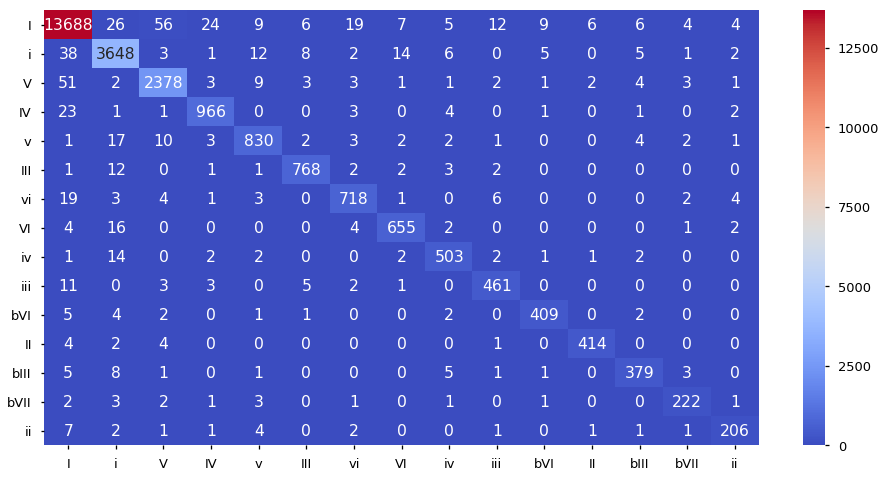

In [48]:
plt.figure(figsize=(16,8))
sns.heatmap(key_bigram_counts.iloc[:15, :15], 
            cmap='coolwarm', 
            annot=True,
            fmt='.0f'
           )
plt.yticks(rotation=0);

In [49]:
for i in range(len(key_bigram_counts)):
    key_bigram_counts.iloc[i,i] = 0

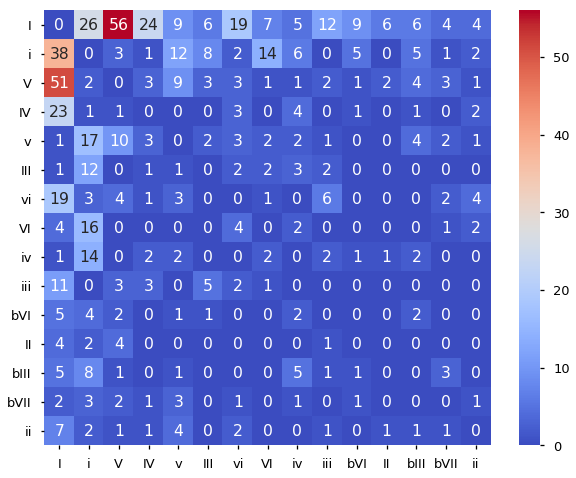

In [53]:
plt.figure(figsize=(10,8))
sns.heatmap(key_bigram_counts.iloc[:15,:15], 
            cmap='coolwarm', 
            annot=True, 
            fmt='.0f',
           )

plt.yticks(rotation=0);

In [124]:
movements = []

for index, group in grouped:
    movements.append(group['local_key'].values)

In [137]:
movements[0]

array(['I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I',
       'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I',
       'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I',
       'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'v', 'v', 'v', 'v', 'v',
       'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v',
       'v', 'v', 'v', 'v', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V',
       'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V',
       'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V',
       'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V',
       'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V',
       'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V',
       'V', 'V', 'V', 'V', 'V', 'III', 'IV', 'IV', 'IV', 'IV', 'IV', 'IV',
       'vi', 'vi', 'vi', 'vi', 'vi', 'vi', 'vi', 'vi', 'vi', 'vi', 'vi',
       'vi', 'vi', 'ii', 'ii', 'ii', 'ii', 'ii', 'ii', 'ii',

In [144]:
regions = []

current = ''
count = 0

for index, chord in enumerate(movements[0]):
    if chord is not current:
        regions.append((current, count))
        current = chord
        count = 1
    else:
        count +=1
regions.append((current, count))

In [145]:
regions

[('', 0),
 ('I', 47),
 ('v', 22),
 ('V', 79),
 ('III', 1),
 ('IV', 6),
 ('vi', 13),
 ('ii', 12),
 ('v', 13),
 ('i', 4),
 ('IV', 4),
 ('iv', 7),
 ('i', 8),
 ('I', 23),
 ('bVI', 20),
 ('bII', 10),
 ('i', 16),
 ('I', 12),
 ('V', 8),
 ('I', 102)]

In [171]:
df.local_key.unique()

array(['I', 'vi', 'iii', 'ii', 'V', '#V', 'IV', '#iii', '#I', 'bVII', 'i',
       'bIII', 'v', 'VI', 'II', '#iv', 'bVI', 'III', 'iv', '#i', 'vii',
       'VII', 'biii', 'bII', 'bV', 'a', '#vii', '#II', '#III', 'bvii',
       'Ab', '#ii', '#IV', '#v', 'bI', 'bIV', 'bi', 'bv', 'bii', '#VI'],
      dtype=object)

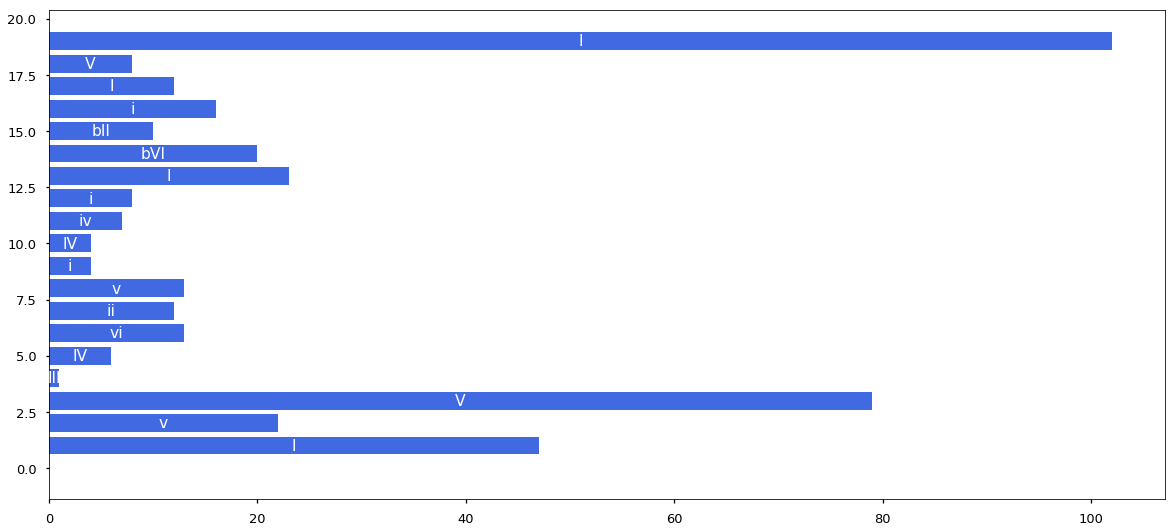

In [203]:
fig, ax = plt.subplots(1, figsize=(20,9))


x=0
for i, r in enumerate(regions):
    plt.barh(i, r[1], color='royalblue')
    plt.text(r[1]/2, i, r[0], 
             verticalalignment='center',
            horizontalalignment='center', color='w')
    x +=r[1]

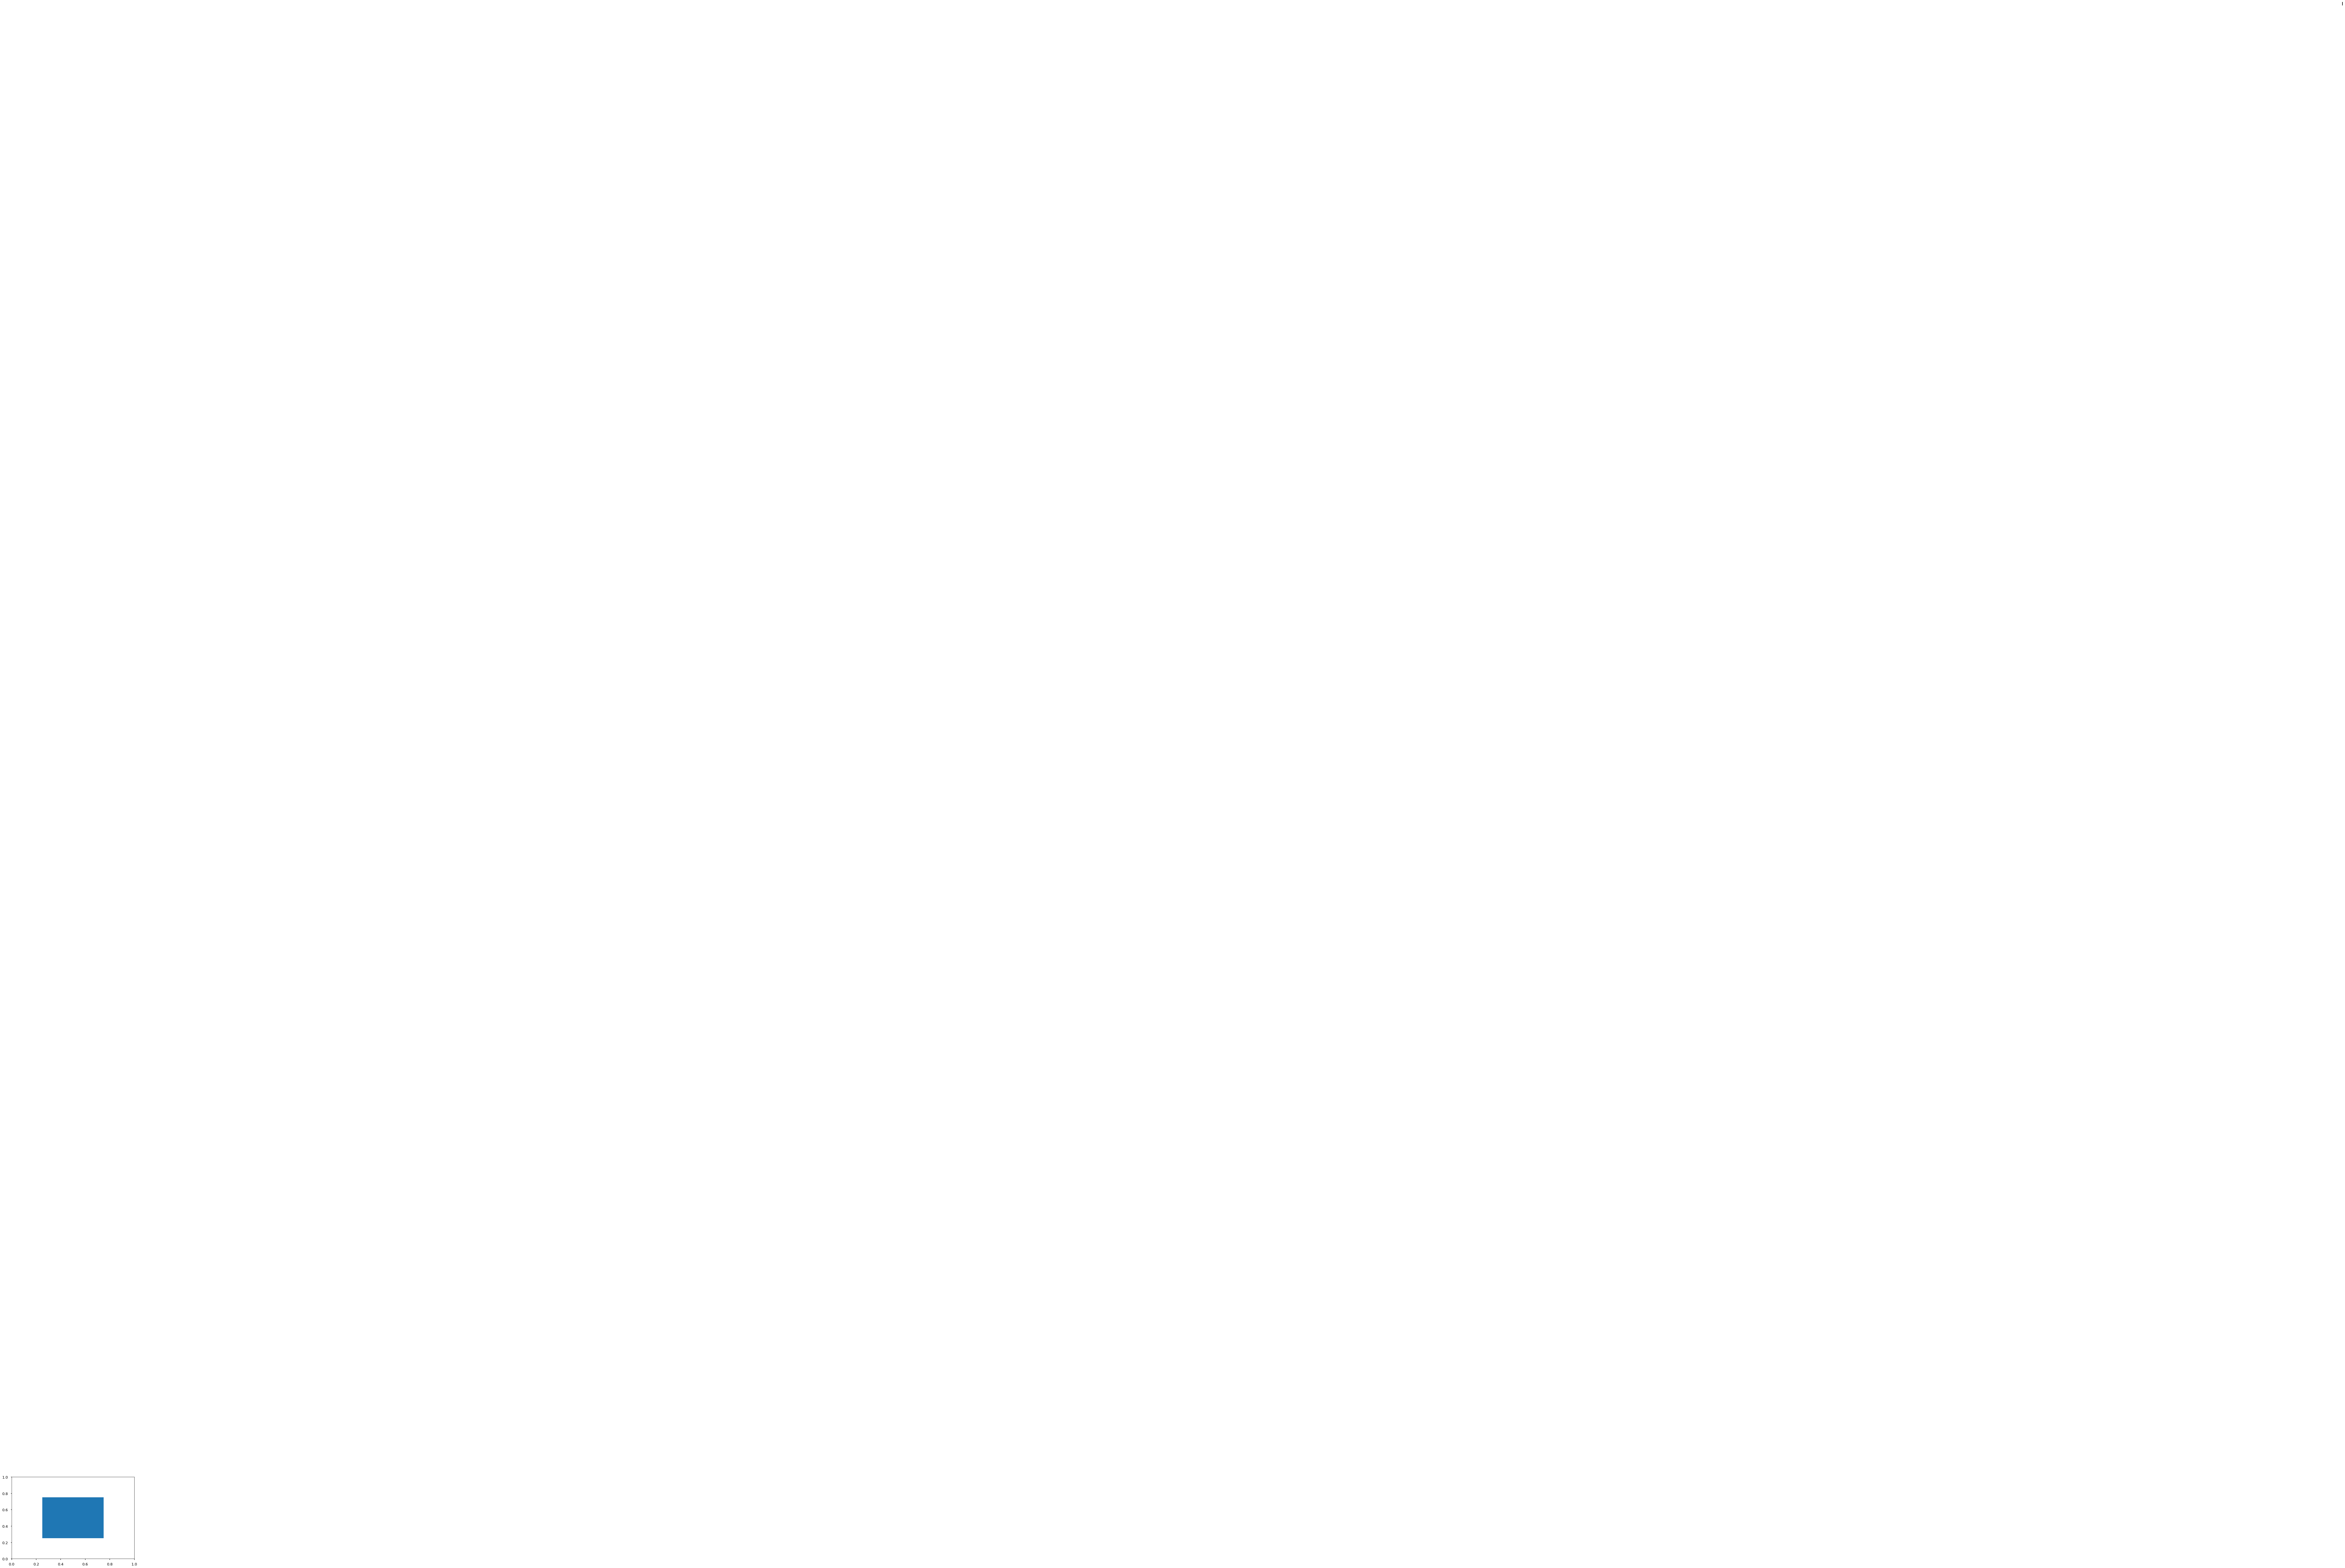

In [247]:
import matplotlib.patches as patches

# build a rectangle in axes coords
left, width = .25, .5
bottom, height = .25, .5
right = left + width
top = bottom + height

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

for index, r in enumerate(regions):

    # axes coordinates are 0,0 is bottom left and 1,1 is upper right
    p = patches.Rectangle(
        (left, bottom), width, height,
        fill=True, transform=ax.transAxes, clip_on=False
        )

    ax.add_patch(p)
    ax.text(0.5, i, 'I')